# NumPy Basics: Arrays and Vectorized Computation

NumPy, short for Numerical Python, is one of the most important foundational pack
ages for numerical computing in Python. Many computational packages providing scientific functionality use NumPy’s array objects as one of the standard interface lingua francas for data exchange. Much of the knowledge about NumPy that I cover is transferable to pandas as well.

Here are some of the things you’ll find in NumPy:
1. ndarray, an efficient multidimensional array providing fast array-oriented arith
metic operations and flexible broadcasting capabilities
2. Mathematical functions for fast operations on entire arrays of data without hav
ing to write loops
3. Tools for reading/writing array data to disk and working with memory-mapped
 files
4. Linear algebra, random number generation, and Fourier transform capabilities
5. A C API for connecting NumPy with libraries written in C, C++, or FORTRAN.

Because NumPy provides a comprehensive and well-documented C API, it is straightforward to pass data to external libraries written in a low-level language, and for external libraries to return data to Python as NumPy arrays. This feature has made Python a language of choice for wrapping legacy C, C++, or FORTRAN codebases and giving them a dynamic and accessible interface.

While NumPy by itself does not provide modeling or scientific functionality, having an understanding of NumPy arrays and array-oriented computing will help you use tools with array computing semantics, like pandas, much more effectively.

For most data analysis applications, the main areas of functionality I’ll focus on are:

1. Fast array-based operations for data munging and cleaning, subsetting and filter
ing, transformation, and any other kind of computation
2. Common array algorithms like sorting, unique, and set operations
3. Efficient descriptive statistics and aggregating/summarizing data
4. Data alignment and relational data manipulations for merging and joining heter
ogeneous datasets
5. Expressing conditional logic as array expressions instead of loops with if-elif
else branches
6. Group-wise data manipulations (aggregation, transformation, and function application)

While NumPy provides a computational foundation for general numerical data
processing, many readers will want to use pandas as the basis for most kinds of statistics or analytics, especially on tabular data. Also, pandas provides some more domain-specific functionality like time series manipulation, which is not present in NumPy

 One of the reasons NumPy is so important for numerical computations in Python is
 because it is designed for efficiency on large arrays of data. There are a number of
 reasons for this:

1. NumPy internally stores data in a contiguous block of memory, independent of
 other built-in Python objects. NumPy’s library of algorithms written in the C lan
guage can operate on this memory without any type checking or other overhead.
 NumPy arrays also use much less memory than built-in Python sequences.
2. NumPy operations perform complex computations on entire arrays without the need for Python for loops, which can be slow for large sequences. NumPy is faster than regular Python code because its C-based algorithms avoid overhead present with regular interpreted Python code. To give you an idea of the performance difference, consider a NumPy array of one
 million integers, and the equivalent Python list


In [2]:
import numpy as np

my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

NumPy-based algorithms are generally 10 to 100 times faster (or more) than their
 pure Python counterparts and use significantly less memory.

In [3]:
%timeit my_arr2 = my_arr * 2
%timeit my_list2 = [x * 2 for x in my_list]

940 µs ± 159 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
51.1 ms ± 972 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


##  The NumPy ndarray: A Multidimensional Array Object
 One of the key features of NumPy is its N-dimensional array object, or ndarray,
 which is a fast, flexible container for large datasets in Python. Arrays enable you to
 perform mathematical operations on whole blocks of data using similar syntax to the
 equivalent operations between scalar elements.
 To give you a flavor of how NumPy enables batch computations with similar syntax
 to scalar values on built-in Python objects, I first import NumPy and create a small
 array:

In [ ]:
import numpy as np
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

In [ ]:
data * 10
data + data

 In the first example, all of the elements have been multiplied by 10. In the second, the
 corresponding values in each “cell” in the array have been added to each other.

 An ndarray is a generic multidimensional container for homogeneous data; that is, all
 of the elements must be the same type. Every array has a shape, a tuple indicating the
 size of each dimension, and a dtype, an object describing the data type of the array:

In [ ]:
data.shape
data.dtype

###  Creating ndarrays
 The easiest way to create an array is to use the array function. This accepts any
 sequence-like object (including other arrays) and produces a new NumPy array
 containing the passed data. For example, a list is a good candidate for conversion:

In [ ]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

In [ ]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

Since data2 was a list of lists, the NumPy array arr2 has two dimensions, with
 shape inferred from the data. We can confirm this by inspecting the ndim and shape
 attributes:

In [ ]:
arr2.ndim
arr2.shape

In [ ]:
arr1.dtype
arr2.dtype

In addition to numpy.array, there are a number of other functions for creating
 new arrays. As examples, numpy.zeros and numpy.ones create arrays of 0s or 1s,
 respectively, with a given length or shape. numpy.empty creates an array without
 initializing its values to any particular value. To create a higher dimensional array
 with these methods, pass a tuple for the shape:

In [ ]:
np.zeros(10)
np.zeros((3, 6))
np.empty((2, 3, 2))

 It’s not safe to assume that numpy.empty will return an array of all
 zeros. This function returns uninitialized memory and thus may
 contain nonzero “garbage” values. You should use this function
 only if you intend to populate the new array with data.

  numpy.arange is an array-valued version of the built-in Python range function:


In [ ]:
np.arange(15)

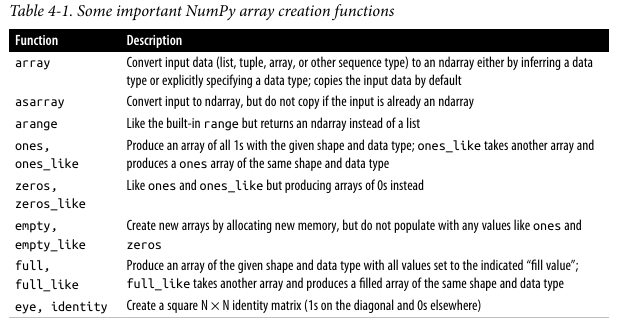

## Exercise 1: Treasure Map Explorer
You’ve found a treasure map with cryptic coordinates! Your task is to write a program that processes the map data and helps locate the treasure.

### Description
- The map is represented as a grid of integers where each cell contains a "clue."
- The treasure is located at the maximum value in the grid.
- You will write functions to:
  - Generate the grid from random values.
  - Find the dimensions and shape of the grid.
  - Locate the treasure (position of the maximum value).
  - Double-check the grid by applying transformations (e.g., scaling all values).


In [8]:
# EXERCISE: Treasure Map Explorer
import numpy as np

# TODO: Function 1: Generate the treasure map
# This function should:
# 1. Take two arguments (rows, cols) to specify the grid size.
# 2. Return a NumPy array filled with random integers (e.g., between 1 and 100).
def generate_map(rows, cols):
  """
  Generate a treasure map with random clues.

  Args:
      rows (int): Number of rows in the map.
      cols (int): Number of columns in the map.

  Returns:
      np.ndarray: The treasure map as a 2D NumPy array.
  """
  # Hint: Use np.random.randint to create random integers
  # TODO: Replace with your code

  return np.random.randint(1, 100, size=(rows, cols))

# TODO: Function 2: Analyze the map
# This function should:
# 1. Take the treasure map as input.
# 2. Return its dimensions and shape.
def analyze_map(treasure_map):
  """
  Analyze the dimensions and shape of the treasure map.

  Args:
      treasure_map (np.ndarray): The treasure map.

  Returns:
      tuple: (dimensions, shape) of the map.
  """
  # Hint: Use the ndim and shape attributes of NumPy arrays
  # TODO: Replace with your code

  return treasure_map.ndim, treasure_map.shape

# TODO: Function 3: Find the treasure
# This function should:
# 1. Take the treasure map as input.
# 2. Return the position (row, col) of the maximum value in the map.
def find_treasure(treasure_map):
  """
  Locate the treasure in the map.

  Args:
      treasure_map (np.ndarray): The treasure map.

  Returns:
      tuple: Position of the treasure as (row, col).
  """
  # Hint: Use np.argmax and unravel_index
  # TODO: Replace with your code

  return np.argmax(treasure_map, keepdims=True)

# TODO: Function 4: Transform the map
# This function should:
# 1. Take the treasure map and a multiplier as input.
# 2. Return a new map where all values are multiplied by the multiplier.
def transform_map(treasure_map, multiplier):
  """
  Scale the treasure map values.

  Args:
      treasure_map (np.ndarray): The treasure map.
      multiplier (int or float): The scale factor.

  Returns:
      np.ndarray: Transformed treasure map.
  """
  # Hint: Use element-wise multiplication with NumPy arrays
  return treasure_map * multiplier

# MAIN PROGRAM
# Step 1: Generate a 5x5 treasure map
# Step 2: Analyze the map and print its dimensions and shape
# Step 3: Find the treasure's position and print it
# Step 4: Transform the map by doubling all values and print the result

def main():
  # Generate a 5x5 treasure map
  treasure_map = generate_map(5, 5)
  print("Treasure Map:")
  print(treasure_map)

  # Analyze the map
  dimensions, shape = analyze_map(treasure_map)
  print(f"Dimensions: {dimensions}, Shape: {shape}")

  # Find the treasure
  treasure_pos = find_treasure(treasure_map)
  print(f"Treasure is located at position: {treasure_pos}")

  # Transform the map
  transformed_map = transform_map(treasure_map, 2)
  print("Transformed Map:")
  print(transformed_map)
  
main()


Treasure Map:
[[59 61 83 80 59]
 [54  1 59 81 90]
 [52 10 93 44 92]
 [29 85 33 61 79]
 [ 8 14 54 71 69]]
Dimensions: 2, Shape: (5, 5)
Treasure is located at position: [[12]]
Transformed Map:
[[118 122 166 160 118]
 [108   2 118 162 180]
 [104  20 186  88 184]
 [ 58 170  66 122 158]
 [ 16  28 108 142 138]]


## Exercise 2: Weather Analyzer
You’re developing a weather analytics tool for a smart city project. Your task is to analyze temperature data from sensors.

### Description
- The data is represented as a 7x24 matrix where rows represent days of the week and columns represent hourly temperatures.
- Write functions to:
  - Generate the temperature data.
  - Find the average temperature for each day.
  - Identify the hottest hour of the week.
  - Normalize the temperature values to a scale of 0-1.

In [ ]:
# EXERCISE: Weather Analyzer
import numpy as np

# TODO: Function 1: Generate temperature data
# This function should:
# 1. Create a 7x24 matrix filled with random temperatures (e.g., between -10 and 40).
# 2. Return the temperature data.
def generate_temperature_data():
  """
  Generate weekly temperature data.

  Returns:
      np.ndarray: A 7x24 matrix of random temperatures.
  """
  # Hint: Use np.random.randint to create random temperatures
  pass  # TODO: Replace with your code

# TODO: Function 2: Calculate daily averages
# This function should:
# 1. Take the temperature matrix as input.
# 2. Return a 1D array of average temperatures for each day.
def calculate_daily_averages(temperature_data):
  """
  Calculate daily average temperatures.

  Args:
      temperature_data (np.ndarray): 7x24 matrix of temperatures.

  Returns:
      np.ndarray: 1D array of daily averages.
  """
  # Hint: Use np.mean with axis=1
  pass  # TODO: Replace with your code

# TODO: Function 3: Find the hottest hour
# This function should:
# 1. Take the temperature matrix as input.
# 2. Return the day and hour with the highest temperature.
def find_hottest_hour(temperature_data):
  """
  Identify the hottest hour of the week.

  Args:
      temperature_data (np.ndarray): 7x24 matrix of temperatures.

  Returns:
      tuple: Day and hour of the highest temperature.
  """
  # Hint: Use np.argmax and unravel_index
  pass  # TODO: Replace with your code

# TODO: Function 4: Normalize temperatures
# This function should:
# 1. Take the temperature matrix as input.
# 2. Return a new matrix with values normalized to the range 0-1.
def normalize_temperatures(temperature_data):
  """
  Normalize temperature values to the range 0-1.

  Args:
      temperature_data (np.ndarray): 7x24 matrix of temperatures.

  Returns:
      np.ndarray: Normalized temperature matrix.
  """
  # Hint: Use (data - min) / (max - min)
  pass  # TODO: Replace with your code

# MAIN PROGRAM
# Step 1: Generate weekly temperature data
# Step 2: Calculate and print daily averages
# Step 3: Find and print the hottest hour
# Step 4: Normalize and print the temperature data


Data Types for ndarrays
The  data  type  or  dtype  is  a  special  object  containing  the  information  (or  metadata,
data  about  data)  the  ndarray  needs  to  interpret  a  chunk  of  memory  as  a  particular
type of data:

In [ ]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype
arr2.dtype

You  can  explicitly  convert  or  cast  an  array  from  one  data  type  to  another  using
ndarray’s astype method

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr
float_arr.dtype

In  this  example,  integers  were  cast  to  floating  point.  If  I  cast  some  floating-point
numbers to be of integer data type, the decimal part will be truncated

In [ ]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

If you have an array of strings representing numbers, you can use astype to convert
them to numeric form

In [ ]:
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings.astype(float)

If  casting  were  to  fail  for  some  reason  (like  a  string  that  cannot  be  converted  to
float64),  a  ValueError  will  be  raised.  Before,  I  was  a  bit  lazy  and  wrote  float
instead  of  np.float64;  NumPy  aliases  the  Python  types  to  its  own  equivalent  data
types.
You can also use another array’s dtype attribute

In [ ]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

There are shorthand type code strings you can also use to refer to a dtype

In [ ]:
zeros_uint32 = np.zeros(8, dtype="u4")
zeros_uint32

### Arithmetic with NumPy Arrays
Arrays  are  important  because  they  enable  you  to  express  batch  operations  on  data
without  writing  any  for  loops.  NumPy  users  call  this  vectorization.  Any  arithmetic
operations between equal-size arrays apply the operation element-wise

In [ ]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
arr * arr
arr - arr

Arithmetic operations with scalars propagate the scalar argument to each element in
the array

In [ ]:
1 / arr
arr ** 2

Comparisons between arrays of the same size yield Boolean arrays

In [ ]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2
arr2 > arr

### Basic Indexing and Slicing
NumPy array indexing is a deep topic, as there are many ways you may want to select
a  subset  of  your  data  or  individual  elements.  One-dimensional  arrays  are  simple;  on
the surface they act similarly to Python lists

In [ ]:
arr = np.arange(10)
arr
arr[5]
arr[5:8]
arr[5:8] = 12
arr

In [ ]:
arr_slice = arr[5:8]
arr_slice

In [ ]:
arr_slice[1] = 12345
arr

In [ ]:
arr_slice[:] = 64
arr

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

As you can see, if you assign a scalar value to a slice, as in arr[5:8] = 12, the value is
propagated (or broadcast henceforth) to the entire selection

With higher dimensional arrays, you have many more options. In a two-dimensional
array,  the  elements  at  each  index  are  no  longer  scalars  but  rather  one-dimensional
arrays

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

Thus,  individual  elements  can  be  accessed  recursively.  But  that  is  a  bit  too  much
work, so you can pass a comma-separated list of indices to select individual elements.
So these are equivalent

In [ ]:
arr2d[0][2]
arr2d[0, 2]

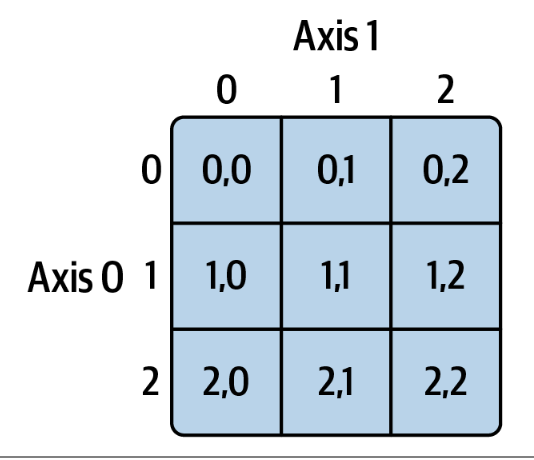

In  multidimensional  arrays,  if  you  omit  later  indices,  the  returned  object  will  be  a
lower dimensional ndarray consisting of all the data along the higher dimensions. So
in the 2 × 2 × 3 array arr3d

In [ ]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

arr3d[0] is a 2 × 3 array

In [ ]:
arr3d[0]

Both scalar values and arrays can be assigned to arr3d[0]

In [ ]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d
arr3d[0] = old_values
arr3d

Similarly,  arr3d[1, 0]  gives  you  all  of  the  values  whose  indices  start  with  (1, 0),
forming a one-dimensional array

In [ ]:
arr3d[1, 0]

In [ ]:
x = arr3d[1]
x
x[0]

### Indexing with slices
Like  one-dimensional  objects  such  as  Python  lists,  ndarrays  can  be  sliced  with  the
familiar syntax:

In [ ]:
arr
arr[1:6]

Consider  the  two-dimensional  array  from  before,  arr2d.  Slicing  this  array  is  a  bit
different

In [ ]:
arr2d
arr2d[:2]

As  you  can  see,  it  has  sliced  along  axis  0,  the  first  axis.  A  slice,  therefore,  selects  a
range of elements along an axis. It can be helpful to read the expression arr2d[:2] as
“select the first two rows of arr2d.”
You can pass multiple slices just like you can pass multiple indexes

In [ ]:
arr2d[:2, 1:]

When slicing like this, you always obtain array views of the same number of dimen‐
sions. By mixing integer indexes and slices, you get lower dimensional slices.
For example, I can select the second row but only the first two columns, like so

In [ ]:
lower_dim_slice = arr2d[1, :2]

Here, while arr2d is two-dimensional, lower_dim_slice is one-dimensional, and its
shape is a tuple with one axis size

In [ ]:
lower_dim_slice.shape

Similarly, I can select the third column but only the first two rows, like so

In [ ]:
arr2d[:2, 2]

Note that a colon by itself means to take the entire
axis, so you can slice only higher dimensional axes by doing

In [ ]:
arr2d[:, :1]

Of course, assigning to a slice expression assigns to the whole selection

In [ ]:
arr2d[:2, 1:] = 0
arr2d

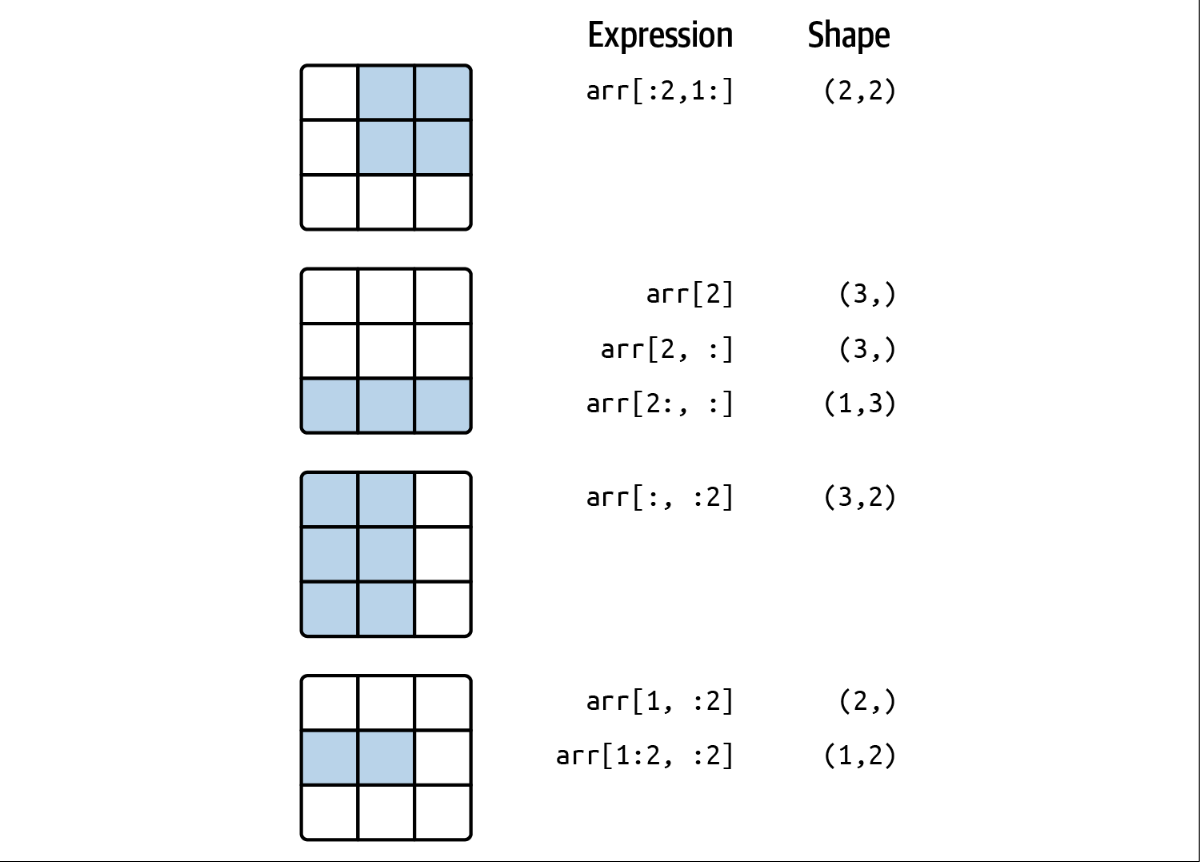

### Boolean Indexing
Let’s consider an example where we have some data in an array and an array of names
with duplicates

In [ ]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],
                 [-12, -4], [3, 4]])
names
data

In [ ]:
names == "Bob"

In [ ]:
data[names == "Bob"]

The Boolean array must be of the same length as the array axis it’s indexing. You can
even mix and match Boolean arrays with slices or integers (or sequences of integers;
more on this later).
In  these  examples,  I  select  from  the  rows  where  names  ==  "Bob"  and  index  the
columns, too

In [ ]:
data[names == "Bob", 1:]
data[names == "Bob", 1]

To select everything but "Bob" you can either use != or negate the condition using -

In [ ]:
names != "Bob"
~(names == "Bob")
data[~(names == "Bob")]

The ~ operator can be useful when you want to invert a Boolean array referenced by a
variable

In [ ]:
cond = names == "Bob"
data[~cond]

To  select  two  of  the  three  names  to  combine  multiple  Boolean  conditions,  use
Boolean arithmetic operators like & (and) and | (or)

In [ ]:
mask = (names == "Bob") | (names == "Will")
mask
data[mask]

Setting  values  with  Boolean  arrays  works  by  substituting  the  value  or  values  on  the
righthand side into the locations where the Boolean array’s values are True. To set all
of the negative values in data to 0, we need only do

In [ ]:
data[data < 0] = 0
data

You can also set whole rows or columns using a one-dimensional Boolean array

In [ ]:
data[names != "Joe"] = 7
data

### Fancy Indexing
Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays.
Suppose we had an 8 × 4 array

In [ ]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
arr

To  select  a  subset  of  the  rows  in  a  particular  order,  you  can  simply  pass  a  list  or
ndarray of integers specifying the desired order

In [ ]:
arr[[4, 3, 0, 6]]

Hopefully this code did what you expected! Using negative indices selects rows from
the end

In [ ]:
arr[[-3, -5, -7]]

Passing  multiple  index  arrays  does  something  slightly  different;  it  selects  a  one-
dimensional array of elements corresponding to each tuple of indices

In [ ]:
arr = np.arange(32).reshape((8, 4))
arr
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

The  behavior  of  fancy  indexing  in  this  case  is  a  bit  different  from  what  some  users
might  have  expected  (myself  included),  which  is  the  rectangular  region  formed  by
selecting a subset of the matrix’s rows and columns. Here is one way to get that

In [ ]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

Keep  in  mind  that  fancy  indexing,  unlike  slicing,  always  copies  the  data  into  a  new
array  when  assigning  the  result  to  a  new  variable.  If  you  assign  values  with  fancy
indexing, the indexed values will be modified

In [ ]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

### Transposing Arrays and Swapping Axes
Transposing  is  a  special  form  of  reshaping  that  similarly  returns  a  view  on  the
underlying  data  without  copying  anything.  Arrays  have  the  transpose  method  and
the special T attribute:

In [ ]:
arr = np.arange(15).reshape((3, 5))
arr
arr.T

When  doing  matrix  computations,  you  may  do  this  very  often—for  example,  when
computing the inner matrix product using numpy.dot

In [ ]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
arr
np.dot(arr.T, arr)

The @ infix operator is another way to do matrix multiplication

In [ ]:
arr.T @ arr

Simple transposing with .T is a special case of swapping axes. ndarray has the method
swapaxes,  which  takes  a  pair  of  axis  numbers  and  switches  the  indicated  axes  to
rearrange the data

In [ ]:
arr
arr.swapaxes(0, 1)

In [ ]:
# ===============================================
# NumPy Array Manipulation and Operations
# ===============================================

# Import NumPy
# TODO 1: Import NumPy (Hint: Use 'import numpy as np').
# This will allow you to access all the NumPy functions easily.

# -----------------------------------------------
# Part 1: Arithmetic with NumPy Arrays
# -----------------------------------------------

# Step 1: Two arrays are given for you.
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([5, 6, 7, 8])

# TODO 2: Perform the following operations using these arrays:
# - Element-wise addition
# - Element-wise multiplication
# - Element-wise division
# Print the results.
# Hint: Use operators like `+`, `*`, `/` directly between the arrays.

# -----------------------------------------------
# Part 2: Basic Indexing and Slicing
# -----------------------------------------------

# Step 1: A 2D array is already defined for you.
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

# TODO 3: Perform the following tasks on the `matrix`:
# - Extract the second row (Hint: Use slicing `matrix[row_index, :]`).
# - Extract the first column (Hint: Use slicing `matrix[:, col_index]`).
# - Extract the value `9` from the matrix.

# Hint: Make use of indices and slicing to achieve these tasks.

# -----------------------------------------------
# Part 3: Boolean Indexing
# -----------------------------------------------

# TODO 4: Use the `matrix` from Part 2.
# Find and print all values greater than 4.
# Hint: Use a Boolean condition like `matrix > 4` to filter values.

# -----------------------------------------------
# Part 4: Fancy Indexing
# -----------------------------------------------

# Step 1: Use this array for fancy indexing.
fancy_array = np.array([
    [10, 20, 30],
    [40, 50, 60],
    [70, 80, 90]
])

# TODO 5: Extract values at the following positions using fancy indexing:
# - Row 0, Column 2
# - Row 1, Column 0
# - Row 2, Column 1
# Hint: Use NumPy arrays of row and column indices.
# Example: np.array([row_indices]), np.array([col_indices]).

# -----------------------------------------------
# Part 5: Transposing Arrays and Swapping Axes
# -----------------------------------------------

# Step 1: Transpose the `matrix` created in Part 2.
# TODO 6: Transpose the matrix and print the result.
# Hint: Use `.T` to transpose a NumPy array.

# Step 2: Create a 3D array.
array_3d = np.arange(24).reshape(2, 3, 4)

# TODO 7: Swap the first and second axes of the `array_3d`.
# Hint: Use `np.swapaxes(array, axis1, axis2)` and print the result.

## Pseudorandom Number Generation
The  numpy.random  module  supplements  the  built-in  Python  random  module  with
functions for efficiently generating whole arrays of sample values from many kinds of
probability distributions. For example, you can get a 4 × 4 array of samples from the
standard normal distribution using numpy.random.standard_normal

In [ ]:
samples = np.random.standard_normal(size=(4, 4))
samples

Python’s  built-in  random  module,  by  contrast,  samples  only  one  value  at  a  time.  As
you  can  see  from  this  benchmark,  numpy.random  is  well  over  an  order  of  magnitude
faster for generating very large samples:

In [ ]:
from random import normalvariate
N = 1_000_000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.standard_normal(N)

These  random  numbers  are  not  truly  random  (rather,  pseudorandom)  but  instead
are generated by a configurable random number generator that determines determin‐
istically  what  values  are  created.  Functions  like  numpy.random.standard_normal  use
the numpy.random module’s default random number generator, but your code can be
configured to use an explicit generator

In [ ]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))

The seed argument is what determines the initial state of the generator, and the state
changes each time the rng object is used to generate data. The generator object rng is
also isolated from other code which might use the numpy.random module

In [ ]:
type(rng)

## Universal Functions: Fast Element-Wise ArrayFunctions
A  universal  function,  or  ufunc,  is  a  function  that  performs  element-wise  operations
on  data  in  ndarrays.  You  can  think  of  them  as  fast  vectorized  wrappers  for  simple
functions that take one or more scalar values and produce one or more scalar results.
Many ufuncs are simple element-wise transformations, like numpy.sqrt or
numpy.exp

In [ ]:
arr = np.arange(10)
arr
np.sqrt(arr)
np.exp(arr)

These are referred to as unary ufuncs. Others, such as numpy.add or numpy.maximum,
take two arrays (thus, binary ufuncs) and return a single array as the result

In [ ]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)
x
y
np.maximum(x, y)

In  this  example,  numpy.maximum  computed  the  element-wise  maximum  of  the  ele‐
ments in x and y.
While not common, a ufunc can return multiple arrays. numpy.modf is one example:
a  vectorized  version  of  the  built-in  Python  math.modf,  it  returns  the  fractional  and
integral parts of a floating-point array

In [ ]:
arr = rng.standard_normal(7) * 5
arr
remainder, whole_part = np.modf(arr)
remainder
whole_part

Ufuncs accept an optional out argument that allows them to assign their results into
an existing array rather than create a new one

In [ ]:
arr
out = np.zeros_like(arr)
np.add(arr, 1)
np.add(arr, 1, out=out)
out

## Array-Oriented Programming with Arrays
Using  NumPy  arrays  enables  you  to  express  many  kinds  of  data  processing  tasks  as
concise  array  expressions  that  might  otherwise  require  writing  loops.  This  practice
of  replacing  explicit  loops  with  array  expressions  is  referred  to  by  some  people
as  vectorization.  In  general,  vectorized  array  operations  will  usually  be  significantly
faster  than  their  pure  Python  equivalents,  with  the  biggest  impact  in  any  kind  of
numerical  computations.  Later,  in  Appendix  A,  I  explain  broadcasting,  a  powerful
method for vectorizing computations.

As  a  simple  example,  suppose  we  wished  to  evaluate  the  function  sqrt(x^2  +
y^2)  across  a  regular  grid  of  values.  The  numpy.meshgrid  function  takes  two  one-
dimensional arrays and produces two two-dimensional matrices corresponding to all
pairs of (x, y) in the two arrays

In [ ]:
points = np.arange(-5, 5, 0.01) # 100 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

In [ ]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [ ]:
plt.draw()

In [ ]:
plt.close("all")

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [ ]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

In [ ]:
result = np.where(cond, xarr, yarr)
result

In [ ]:
arr = rng.standard_normal((4, 4))
arr
arr > 0
np.where(arr > 0, 2, -2)

In [ ]:
np.where(arr > 0, 2, arr) # set only positive values to 2

In [ ]:
arr = rng.standard_normal((5, 4))
arr
arr.mean()
np.mean(arr)
arr.sum()

In [ ]:
arr.mean(axis=1)
arr.sum(axis=0)

In [ ]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

In [ ]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

In [ ]:
arr.cumsum(axis=0)
arr.cumsum(axis=1)

In [ ]:
arr = rng.standard_normal(100)
(arr > 0).sum() # Number of positive values
(arr <= 0).sum() # Number of non-positive values

In [ ]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

In [ ]:
arr = rng.standard_normal(6)
arr
arr.sort()
arr

In [ ]:
arr = rng.standard_normal((5, 3))
arr

In [ ]:
arr.sort(axis=0)
arr
arr.sort(axis=1)
arr

In [ ]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

In [ ]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

In [ ]:
sorted(set(names))

In [ ]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

In [ ]:
arr = np.arange(10)
np.save("some_array", arr)

In [ ]:
np.load("some_array.npy")

In [ ]:
np.savez("array_archive.npz", a=arr, b=arr)

In [ ]:
arch = np.load("array_archive.npz")
arch["b"]

In [ ]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

In [ ]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

In [ ]:
np.dot(x, y)

In [ ]:
x @ np.ones(3)

In [ ]:
from numpy.linalg import inv, qr
X = rng.standard_normal((5, 5))
mat = X.T @ X
inv(mat)
mat @ inv(mat)

In [ ]:
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)


In [ ]:
plt.figure()

In [ ]:
plt.plot(walk[:100])

In [ ]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)  # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [ ]:
walk.min()
walk.max()

In [ ]:
(np.abs(walk) >= 10).argmax()

In [ ]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

In [ ]:
walks.max()
walks.min()

In [ ]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30
hits30.sum() # Number that hit 30 or -30

In [ ]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

In [ ]:
crossing_times.mean()

In [ ]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))